<a href="https://colab.research.google.com/github/miftaadiwira16/Iris-Prediction-Using-Python/blob/main/Iris_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Prediction

## Created by Mifta Adiwira Jati Jaka.

### Dataset Story

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

## Import Library

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [32]:
import io
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


## Load Dataset

In [33]:
df = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


From the data information above, we can see:
- There are 150 rows and 6 columns.
- There are 3 datatypes which are 1 int64, 4 float64, 1 object.
- There is no missing / null values.

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [36]:
min_max_by_species = df.groupby('Species').agg(['min', 'max']).stack(level=0)
min_max_by_species

max    min
Species                                    
Iris-setosa     Id              50.0    1.0
                PetalLengthCm    1.9    1.0
                PetalWidthCm     0.6    0.1
                SepalLengthCm    5.8    4.3
                SepalWidthCm     4.4    2.3
Iris-versicolor Id             100.0   51.0
                PetalLengthCm    5.1    3.0
                PetalWidthCm     1.8    1.0
                SepalLengthCm    7.0    4.9
                SepalWidthCm     3.4    2.0
Iris-virginica  Id             150.0  101.0
                PetalLengthCm    6.9    4.5
                PetalWidthCm     2.5    1.4
                SepalLengthCm    7.9    4.9
                SepalWidthCm     3.8    2.2

From this information above, we know that:
- Iris setosa has:
  - Petal length 1.0 cm - 1.9 cm.
  - Petal width 0.1 cm - 0.6 cm.
  - Sepal length 4.3 cm - 5.8 cm.
  - Sepal width 2.3 cm - 4.4 cm.

- Iris versicolor has:
  - Petal length 3.0 cm - 5.1 cm.
  - Petal width 1.0 cm - 1.8 cm.
  - Sepal length 4.9 cm - 7.0 cm.
  - Sepal width 2.0 cm - 3.4 cm.

- Iris virginica has:
  - Petal length 4.5 cm - 6.9 cm.
  - Petal width 1.4 cm - 2.5 cm.
  - Sepal length 4.9 cm - 7.9 cm.
  - Sepal width 2.2 cm - 3.8 cm.

In [37]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Visualization

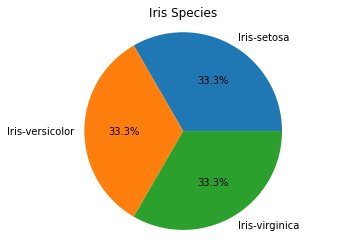

In [38]:
species_data = df.groupby(['Species']).size()

my_labels = 'Iris-setosa','Iris-versicolor','Iris-virginica'
plt.pie(species_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Iris Species')
plt.axis('equal')
plt.show()

This dataset has balanced dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


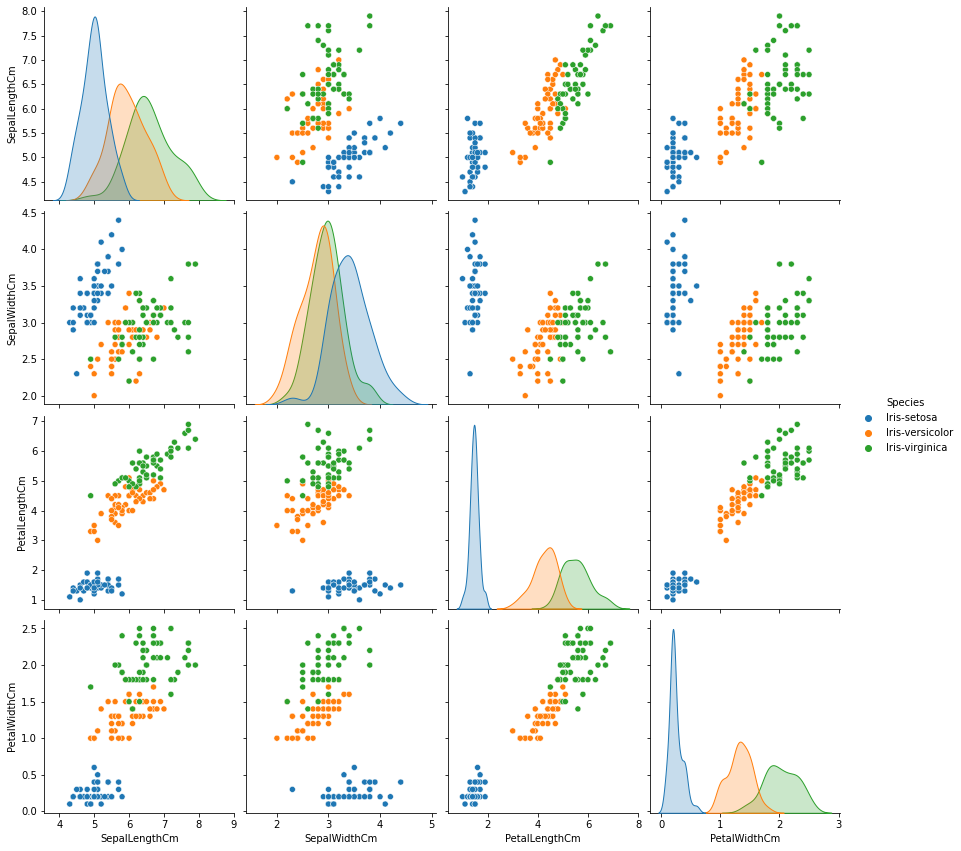

In [39]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3)

Distribution of data in each variable for target class.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


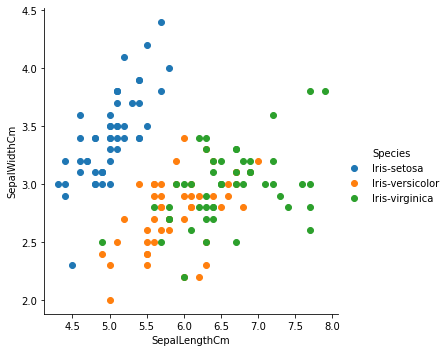

In [40]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

For Sepal Length and Sepal Width:
- Iris setosa has:
  - Sepal Length: 4.3 cm - 5.8 cm.
  - Sepal Width: 2.3 cm - 4.4 cm.

- Iris versicolor has:
  - Sepal Length: 4.9 cm - 7.0 cm.
  - Sepal Width: 2.0 cm - 3.4 cm.

- Iris virginica has:
  - Sepal Length: 4.9 cm - 7.9 cm.
  - Sepal Width: 2.2 cm - 3.8 cm.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


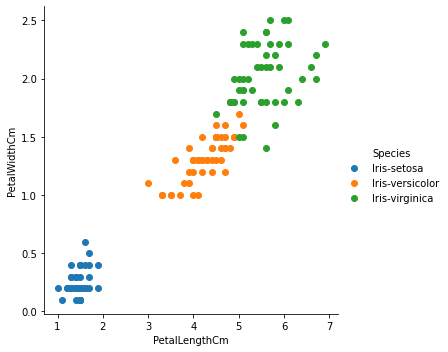

In [41]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

For Petal Length and Petal Width:

- Iris setosa has:
  - Petal Length: 1.0 cm - 1.9 cm.
  - Petal Width: 0.1 cm - 0.6 cm.

- Iris versicolor has:
  - Petal Length: 3.0 cm - 5.1 cm.
  - Petal Width: 1.0 cm - 1.8 cm.

- Iris virginica has:
  - Petal Length: 4.5 cm - 6.9 cm.
  - Petal Width: 1.4 cm - 2.5 cm.

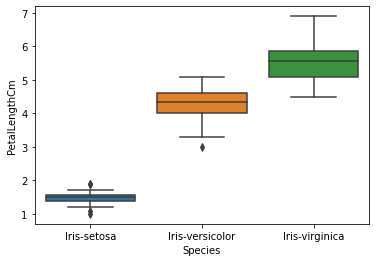

In [42]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

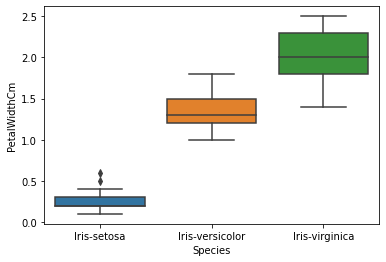

In [43]:
sns.boxplot(x="Species", y="PetalWidthCm", data=df)

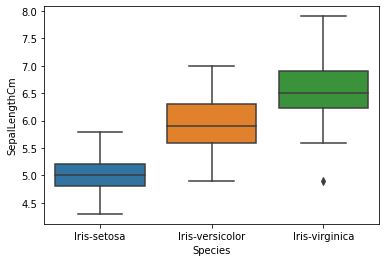

In [44]:
sns.boxplot(x="Species", y="SepalLengthCm", data=df)

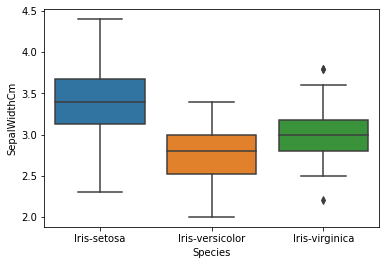

In [45]:
sns.boxplot(x="Species", y="SepalWidthCm", data=df)

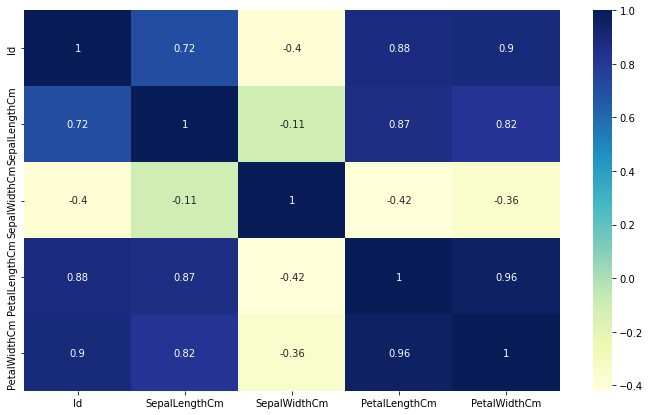

In [46]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

From the heatmap, we could see that the Petal length and the Petal width have a high correlation (96%). It makes sense because the longer the petals, the wider the petals.

## Data Preprocessing

In [47]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

### Train-Test split 70% training & 30% testing

In [48]:
# hold-out method, divided into training and testing sets. 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model deployment

### Logistic Regression

Accuracy  1.0
Precision  1.0
Recall  1.0
Confusion matrix  [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


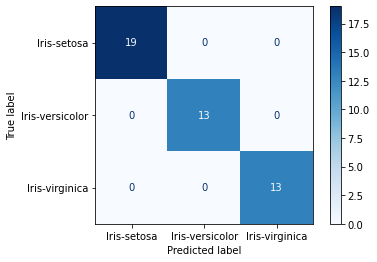

In [49]:
model=LogisticRegression()
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# calculate model performance with accuracy, precision, recall, confusion matrix.
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Decision Tree

Accuracy  1.0
Precision  1.0
Recall  1.0
Confusion matrix  [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


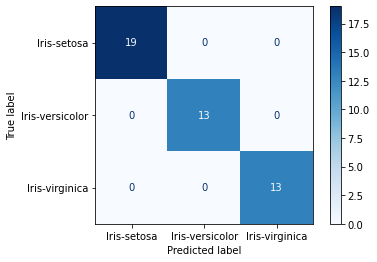

In [61]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# calculate model performance with accuracy, precision, recall, confusion matrix.
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### SVM

Accuracy  1.0
Precision  1.0
Recall  1.0
Confusion matrix  [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


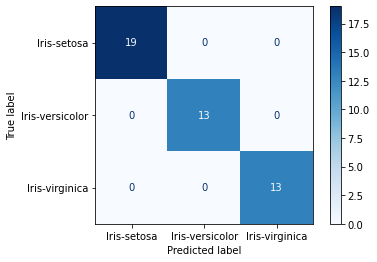

In [51]:
model=svm.SVC()
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# calculate model performance with accuracy, precision, recall, confusion matrix.
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### KNN

Accuracy  1.0
Precision  1.0
Recall  1.0
Confusion matrix  [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


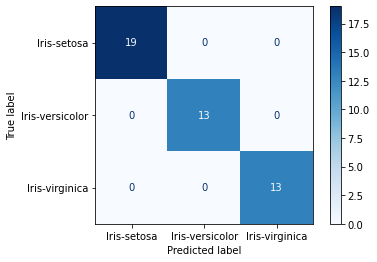

In [52]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# calculate model performance with accuracy, precision, recall, confusion matrix.
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Random Forest Classifier

Accuracy  1.0
Precision  1.0
Recall  1.0
Confusion matrix  [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


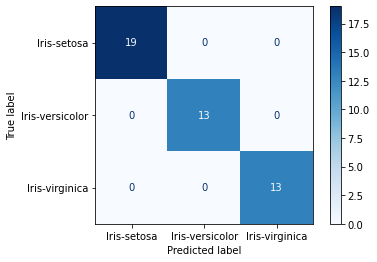

In [53]:
model=RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# calculate model performance with accuracy, precision, recall, confusion matrix.
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Testing Model

In [54]:
model=LogisticRegression()
model.fit(X_train, y_train)

model.predict([[5.3, 3.2, 1.5, 1.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-setosa'], dtype=object)

In [56]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

model.predict([[5.3, 3.2, 1.5, 1.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-setosa'], dtype=object)

In [57]:
model=RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

model.predict([[5.3, 3.2, 1.5, 1.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-setosa'], dtype=object)

In [58]:
model=svm.SVC()
model.fit(X_train, y_train)

model.predict([[5.3, 3.2, 1.5, 1.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-setosa'], dtype=object)

In [62]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

model.predict([[5.3, 3.2, 1.5, 1.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-setosa'], dtype=object)

## Conclusion

- The machine learning that I build (Logistic Regression, Decision Tree, SVM, KNN, Random Forest Classifier) for predict and classify the iris species has 100% accuracy, its because this dataset has balaced dataset, this dataset is not big data so that the machine can learn the pattern easily.

- Iris setosa has:
  - Petal length 1.0 cm - 1.9 cm.
  - Petal width 0.1 cm - 0.6 cm.
  - Sepal length 4.3 cm - 5.8 cm.
  - Sepal width 2.3 cm - 4.4 cm.

- Iris versicolor has:
  - Petal length 3.0 cm - 5.1 cm.
  - Petal width 1.0 cm - 1.8 cm.
  - Sepal length 4.9 cm - 7.0 cm.
  - Sepal width 2.0 cm - 3.4 cm.

- Iris virginica has:
  - Petal length 4.5 cm - 6.9 cm.
  - Petal width 1.4 cm - 2.5 cm.
  - Sepal length 4.9 cm - 7.9 cm.
  - Sepal width 2.2 cm - 3.8 cm.